In [48]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.metrics import mean_squared_error


### Load Data

In [49]:
train = pd.read_csv('datasets/train_cleaned.csv', index_col='Id', na_filter=False)

In [50]:
X = train.drop(columns = 'SalePrice')
y = train['SalePrice']

In [51]:
X_test = pd.read_csv('datasets/test_cleaned.csv', index_col = 'Id', na_filter=False)
X_test.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,is Shed,is PUD,Cond Feeder,Cond Artery,Cond Pos,Cond RR,Porch SF,MoYr Sold,is Remodeled,Last Remodel
Id,,,,,,,,,,,,,,,,,,,,,
2658,RM,69.0000,9142,1,Grvl,0,Lvl,AllPub,Inside,0,...,0,0,0,0,0,0,172,2006.333333,1,56
2718,RL,69.0552,9662,1,None,1,Lvl,AllPub,Inside,0,...,0,0,0,0,0,0,170,2006.666667,0,29
2414,RL,58.0000,17104,1,None,1,Lvl,AllPub,Inside,0,...,0,0,0,0,0,0,124,2006.750000,0,0
1989,RM,60.0000,8520,1,None,0,Lvl,AllPub,Inside,0,...,0,0,0,0,0,0,184,2007.583333,1,1
625,RL,69.0552,9500,1,None,1,Lvl,AllPub,Inside,0,...,0,0,0,0,0,0,261,2009.583333,0,46


In [52]:
X.isna().any().any()

False

In [53]:
X_test.isna().any().any()

False

In [54]:
X.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Garage Ratio,is Shed,is PUD,Cond Feeder,Cond Artery,Cond Pos,Cond RR,Porch SF,is Remodeled,Last Remodel
Id,,,,,,,,,,,,,,,,,,,,,
109,RL,69.0552,13517,1,None,1,Lvl,AllPub,CulDSac,0,...,237.5,0,0,0,0,0,1,44,1,5
544,RL,43.0000,11492,1,None,1,Lvl,AllPub,CulDSac,0,...,279.5,0,0,0,0,0,0,74,1,12
153,RL,68.0000,7922,1,None,0,Lvl,AllPub,Inside,0,...,246.0,0,0,0,0,0,0,52,1,3
318,RL,73.0000,9802,1,None,0,Lvl,AllPub,Inside,0,...,200.0,0,0,0,0,0,0,100,1,3
255,RL,82.0000,14235,1,None,1,Lvl,AllPub,Inside,0,...,242.0,0,0,0,0,0,0,59,1,17


In [55]:
X.dtypes

MS Zoning        object
Lot Frontage    float64
Lot Area          int64
Street            int64
Alley            object
                 ...   
Cond Pos          int64
Cond RR           int64
Porch SF          int64
is Remodeled      int64
Last Remodel      int64
Length: 64, dtype: object

### Helper Functions

#### Fit model, score on train, predict, and save outputs

In [56]:
def run_model(model, out, X = X, X_test = X_test):
    model.fit(X, y)
    print(model.score(X, y))
    preds = model.predict(X_test)
    out_df = pd.DataFrame(preds, columns = ['SalePrice'], index = X_test.index)
    out_df.to_csv('submission/' + out + '.csv')

### Linear Regression model

In [57]:
encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    (OneHotEncoder(), ['Mo Sold', 'Yr Sold', 'MoYr Sold']),
    (StandardScaler(), make_column_selector(dtype_include = [int, float])),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [58]:
pipe = make_pipeline(
    encoder,
    LinearRegression()
)

In [59]:
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AE4B5CABB0>),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['Mo Sold', 'Yr Sold',
                                                   'MoYr Sold']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AE4B5CA820>)],
                                   verbose_feature_

In [60]:
pipe.score(X, y)

0.9049148098460276

In [61]:
pipe.named_steps['linearregression'].coef_

array([ 5.88563600e+03, -1.37620419e+03, -2.28987594e+03, -2.21955587e+03,
        8.24888585e+02,  8.10938556e+02, -1.63582714e+03, -1.01244490e+04,
        1.05922503e+04,  4.69421678e+02, -9.37223012e+02,  6.01171461e+03,
       -4.18783681e+04,  3.58666535e+04,  2.73572622e+03,  6.84110085e+03,
       -1.47478516e+03, -1.06280184e+04,  2.52597646e+03,  3.87895810e+03,
        8.70658021e+03, -1.06656697e+04, -7.40159588e+03, -9.88867288e+03,
        5.17932073e+03, -2.25313250e+04, -1.32843698e+04, -1.67009021e+04,
        3.81360198e+03, -1.08467086e+04, -1.18610808e+04,  1.39978464e+04,
       -1.61396252e+04,  2.65798653e+04,  3.71799836e+04, -1.87490483e+04,
       -1.77647292e+04, -1.19209809e+04, -1.14892743e+04,  6.99962499e+03,
        4.77778437e+04, -6.43447671e+03,  6.72674537e+03,  2.48380890e+04,
        5.80391687e+03, -4.56290249e+01, -5.50021483e+03, -6.21545512e+03,
        5.95738210e+03,  3.53780200e+03,  2.91844699e+03,  1.03211141e+04,
       -1.59862091e+04,  

In [62]:
X_test['SalePrice'] = pipe.predict(X_test)

In [63]:
X_test[['SalePrice']].to_csv('submission/LinearRegression.csv') 

Overfitting by about 2000

In [64]:
# Kaggle RMSE 26406
mean_squared_error(y, pipe.predict(X), squared=False)

24434.151484870603

### Log Transformation

In [65]:
log_lr_model = TransformedTargetRegressor(regressor = pipe, func = np.log, inverse_func = np.exp)

In [66]:
run_model(log_lr_model, out = 'lr_logTransform') 

0.9046113036154945


*Under*-fitting by about 700.

In [67]:
mean_squared_error(y, log_lr_model.predict(X), squared = False)
# Kaggle score 23733

24473.116589932702

### Ridge Regression

In [68]:
pipe_ridge = make_pipeline(
    encoder,
    Ridge()
)

In [69]:
params_ridge = {'ridge__alpha': np.logspace(-4, 4)}

In [70]:
gs_ridge = GridSearchCV(pipe_ridge, params_ridge)

In [71]:
# gs_ridge.fit(X, y)

In [72]:
run_model(gs_ridge, 'ridge')

0.9009375573453472


In [73]:
pd.DataFrame(gs_ridge.cv_results_).query('rank_test_score < 10')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,0.084803,0.013937,0.023996,0.005058,2.559548,{'ridge__alpha': 2.559547922699533},0.857799,0.889847,0.801152,0.886394,0.825558,0.852150,0.034449,8
28,0.088190,0.016724,0.020250,0.003704,3.727594,{'ridge__alpha': 3.727593720314938},0.858362,0.890913,0.800064,0.888794,0.825344,0.852695,0.035536,7
29,0.065954,0.005938,0.020840,0.003928,5.428675,{'ridge__alpha': 5.428675439323859},0.859272,0.892855,0.800483,0.890496,0.825061,0.853633,0.036250,5
30,0.071817,0.012067,0.017623,0.003206,7.906043,{'ridge__alpha': 7.9060432109076855},0.859769,0.894095,0.798900,0.892218,0.824922,0.853981,0.037371,3
31,0.063976,0.000037,0.022413,0.003193,11.513954,{'ridge__alpha': 11.513953993264458},0.860179,0.895294,0.796718,0.894202,0.825329,0.854344,0.038632,1
32,0.074766,0.013590,0.022412,0.005990,16.768329,{'ridge__alpha': 16.768329368110066},0.859984,0.896103,0.795603,0.895506,0.824040,0.854247,0.039595,2
33,0.065800,0.011743,0.024102,0.008934,24.420531,{'ridge__alpha': 24.420530945486497},0.859660,0.896943,0.793846,0.896817,0.821630,0.853779,0.040928,4
34,0.063992,0.005036,0.024002,0.008753,35.564803,{'ridge__alpha': 35.564803062231285},0.858690,0.897146,0.792361,0.897264,0.820345,0.853161,0.041675,6
35,0.065581,0.003206,0.020807,0.003915,51.794747,{'ridge__alpha': 51.79474679231202},0.857482,0.896391,0.790058,0.897252,0.817580,0.851752,0.042590,9


In [74]:
# gs_ridge.best_estimator_

Overfitting about 300

In [75]:
# Kaggle score 25364
mean_squared_error(y, gs_ridge.predict(X), squared=False)

24939.936227172922

#### Ridge w/ log transform

In [76]:
log_ridge = TransformedTargetRegressor(regressor=gs_ridge, func=np.log, inverse_func=np.exp)

In [78]:
run_model(log_ridge, 'ridge_logT')

0.8865224435070076


In [79]:
log_ridge.regressor_.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AE4B634F40>),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['Mo Sold', 'Yr Sold',
                                                   'MoYr Sold']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AE4B634DC0>)],
                                   verbose_feature_

In [80]:
mean_squared_error(y, log_ridge.predict(X), squared = False)

26692.903116970483

### Feature squares

In [81]:
X_num_cols = [c for c in X.columns if X.dtypes[c] != object and X[c].max() > 1]

In [82]:
len(X_num_cols)

34

In [83]:
X_squared = X[X_num_cols]**2
X_test_squared = X_test[X_num_cols]**2

In [84]:
X_all = X.join(X_squared, rsuffix = '**2')
X_test_all = X_test.join(X_test_squared, rsuffix = '**2')

In [85]:
X_test_all.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Fence**2,Misc Val**2,Mo Sold**2,Yr Sold**2,MoYr Sold**2,Lot Ratio**2,Sum Bath**2,Garage Ratio**2,Porch SF**2,Last Remodel**2
Id,,,,,,,,,,,,,,,,,,,,,
2658,RM,69.0000,9142,1,Grvl,0,Lvl,AllPub,Inside,0,...,0,0,16,4024036,4.025373e+06,3.687110,4.00,193600.0,29584,3136
2718,RL,69.0552,9662,1,None,1,Lvl,AllPub,Inside,0,...,0,0,64,4024036,4.026711e+06,5.331275,4.00,84100.0,28900,841
2414,RL,58.0000,17104,1,None,1,Lvl,AllPub,Inside,0,...,0,0,81,4024036,4.027046e+06,25.851360,12.25,45369.0,15376,0
1989,RM,60.0000,8520,1,None,0,Lvl,AllPub,Inside,0,...,0,0,49,4028049,4.030391e+06,5.601111,1.00,57600.0,33856,1
625,RL,69.0552,9500,1,None,1,Lvl,AllPub,Inside,0,...,0,0,49,4036081,4.038425e+06,5.331275,6.25,66049.0,68121,2116


In [86]:
pipe_squares_ridge = make_pipeline(
    encoder,
    Ridge()
)

In [87]:
gs_squares = GridSearchCV(pipe_squares_ridge, params_ridge)

In [88]:
run_model(gs_squares, 'squares_ridge', X = X_all, X_test = X_test_all)

0.927189921490802


In [89]:
gs_squares.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AE4B639640>),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['Mo Sold', 'Yr Sold',
                                                   'MoYr Sold']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AE4B639D30>)],
                                   verbose_feature_

About 3500 overfitting.

In [90]:
# Kaggle score 24899
mean_squared_error(y, gs_squares.predict(X_all), squared = False)

21381.421354297145

In [91]:
gs_squares.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AE4B639640>),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['Mo Sold', 'Yr Sold',
                                                   'MoYr Sold']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AE4B639D30>)],
                                   verbose_feature_

#### Squares ridge + log

In [92]:
squares_ridge_log = TransformedTargetRegressor(
    regressor = gs_squares, func = np.log, inverse_func = np.exp)

In [93]:
run_model(squares_ridge_log, 'squares_ridge_log', X_all, X_test_all)

0.9437144528539232


In [94]:
squares_ridge_log.regressor_.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AE4C65D820>),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['Mo Sold', 'Yr Sold',
                                                   'MoYr Sold']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AE4C65DDC0>)],
                                   verbose_feature_

Overfitting about 2800

In [95]:
# Kaggle score 21616
mean_squared_error(y, squares_ridge_log.predict(X_all), squared = False)

18799.195680701418

### Elastic net

In [133]:
pipe_elastic_net = make_pipeline(
    encoder,
    ElasticNet(max_iter=30_000, selection='random')
)

In [142]:
params_elastic_net = {
    'elasticnet__alpha': np.logspace(-3.5, 1), # convergence is slower at low alpha values
    'elasticnet__l1_ratio': np.linspace(0.05, 0.5, 10)
}

In [143]:
gs_elastic_net = GridSearchCV(pipe_elastic_net, params_elastic_net, n_jobs = 1, verbose=2)

In [144]:
squares_elastic_net_log = TransformedTargetRegressor(
    regressor = gs_elastic_net, func = np.log, inverse_func = np.exp
)

In [145]:
run_model(squares_elastic_net_log, 'squares_elastic_net_log', X_all, X_test_all)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END elasticnet__alpha=0.00031622776601683794, elasticnet__l1_ratio=0.05; total time=   1.9s
[CV] END elasticnet__alpha=0.00031622776601683794, elasticnet__l1_ratio=0.05; total time=   8.2s
[CV] END elasticnet__alpha=0.00031622776601683794, elasticnet__l1_ratio=0.05; total time=   5.0s
[CV] END elasticnet__alpha=0.00031622776601683794, elasticnet__l1_ratio=0.05; total time=   3.1s
[CV] END elasticnet__alpha=0.00031622776601683794, elasticnet__l1_ratio=0.05; total time=   2.4s
[CV] END elasticnet__alpha=0.00031622776601683794, elasticnet__l1_ratio=0.1; total time=   1.4s
[CV] END elasticnet__alpha=0.00031622776601683794, elasticnet__l1_ratio=0.1; total time=   2.6s
[CV] END elasticnet__alpha=0.00031622776601683794, elasticnet__l1_ratio=0.1; total time=   2.4s
[CV] END elasticnet__alpha=0.00031622776601683794, elasticnet__l1_ratio=0.1; total time=   2.1s
[CV] END elasticnet__alpha=0.00031622776601683794, elasticnet__l1_r

Elastic net is converging to ridge (low l1_ratio) and linear regression (low alpha)

In [146]:
squares_elastic_net_log.regressor_.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AE4DF88760>),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['Mo Sold', 'Yr Sold',
                                                   'MoYr Sold']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AE4DF889A0>)],
                                   verbose_feature_

Overfitting about 2200.

In [147]:
# Kaggle score 21213
mean_squared_error(y, squares_elastic_net_log.predict(X_all), squared = False)

18996.393941427432

In [148]:
(squares_elastic_net_log.regressor_.best_estimator_.named_steps['elasticnet'].coef_ == 0).sum()

104

In [149]:
(squares_elastic_net_log.regressor_.best_estimator_.named_steps['elasticnet'].coef_ != 0).sum()

156

Elastic net sends more than half of the coefficients to 0.

In [120]:
preds = pd.Series(squares_elastic_net_log.predict(X_all), index = y.index)

In [116]:
residuals_en = y - preds

<AxesSubplot:>

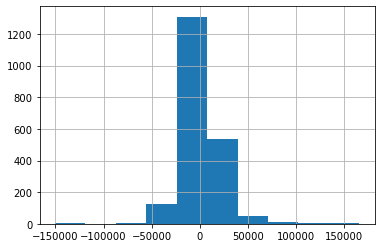

In [117]:
residuals_en.hist()

In [118]:
residuals_en.describe()

count      2051.000000
mean       1319.020864
std       20035.826838
min     -150450.160664
25%       -8259.767427
50%         517.172185
75%        9203.163814
max      165505.323906
Name: SalePrice, dtype: float64

In [124]:
residuals_en.agg([pd.Series.skew, pd.Series.kurtosis])

skew     1.074073
kurt    10.046279
Name: SalePrice, dtype: float64

In [121]:
preds.describe()

count      2051.000000
mean     180150.680745
std       74602.076303
min       41965.787293
25%      128313.051828
50%      161897.475450
75%      213493.830285
max      555409.010873
dtype: float64